```sklearn.datasets.make_blobs```를 사용하여 아래 코드로 데이터를 생성하세요.



```

from sklearn.datasets import make_blobs



X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

```



이 데이터를 4개의 클러스터로 군집화하세요.

Python으로 구현해서 클러스터링하는데, 강의에서 만든 함수 코드를 한 군데 수정해야 한다.

(1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.

(2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.



In [51]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.6, random_state=0)

1)4개로 군집화


In [52]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193 #식으로 구하기
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

In [53]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

In [59]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print("\n\n====== Iteration {} ======".format(iter))
        for i in range(row):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = normDist(centroids[j], x[i])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            clusterAssigned[i] = [minIndex, minDist]
        for cent in range(k):
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        comparison = np.equal(centroids, _centroids)
        if(comparison.all()==True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            print("\n Centroids {}회만에 찾기 완료".format(iter))
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

In [81]:
def cluster(x, k, centroids): #x,k, 초기중심점
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float) #수정부분
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            #print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        #print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids!!\n")# {} => \n{}".format(centroids, _centroids))
            print("\n-----Final Centroids is...\n{}\n".format(_centroids))
            print("\n We found Centroids at {} times.\n".format(iter))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            #print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            if iter==1:
                print("\n Init Centroids is...\n{}".format(centroids))
            print ("\n.....Updating Centroids To..\n{}".format(_centroids))
            centroids = _centroids
            iter += 1

## (1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.

In [82]:
print(y)

[0 3 0 0 0 0 2 3 0 3 3 3 3 3 3 1 1 2 2 1 0 3 2 1 0 2 2 0 1 1 1 3 1 1 2 0 3
 1 3 2 0 2 3 2 2 3 1 2 0 0 0 1 2 2 2 3 3 1 1 3 3 1 1 0 1 3 2 2 1 0 3 1 0 3
 0 0 2 2 1 1 1 3 2 0 1 2 1 1 0 0 0 2 0 2 2 3 3 2 3 0]




====== Iteration 1 ======

 Init Centroids is...
[[ 3.  5.]
 [ 3.  2.]
 [-2.  2.]
 [ 0. 10.]]

.....Updating Centroids To..
[[ 1.01554581  4.46767227]
 [ 1.99299447  1.07350657]
 [-1.25872549  3.25396018]
 [-1.27208964  7.74944718]]


====== Iteration 2 ======

.....Updating Centroids To..
[[ 0.91568734  4.32895204]
 [ 1.97918933  0.97920012]
 [-1.46984735  3.1570263 ]
 [-1.27208964  7.74944718]]


====== Iteration 3 ======

.....Updating Centroids To..
[[ 0.87673717  4.2964758 ]
 [ 1.97918933  0.97920012]
 [-1.52704861  3.14337865]
 [-1.27208964  7.74944718]]


====== Iteration 4 ======

.....NOT Updating Centroids!!


-----Final Centroids is...
[[ 0.87673717  4.2964758 ]
 [ 1.97918933  0.97920012]
 [-1.52704861  3.14337865]
 [-1.27208964  7.74944718]]


 We found Centroids at 4 times.



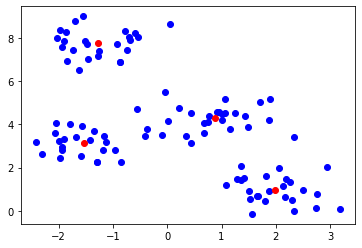

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


k = 4
centroids = np.array([[3,5],[3,2],[-2,2],[0,10]], dtype = float)
#centroids = np.array([[1,1],[4,1]], dtype = float)
centroids, clusterAssigned = cluster(X, k, centroids)
draw(X, centroids)

## (2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

In [84]:
print(y)

[0 3 0 0 0 0 2 3 0 3 3 3 3 3 3 1 1 2 2 1 0 3 2 1 0 2 2 0 1 1 1 3 1 1 2 0 3
 1 3 2 0 2 3 2 2 3 1 2 0 0 0 1 2 2 2 3 3 1 1 3 3 1 1 0 1 3 2 2 1 0 3 1 0 3
 0 0 2 2 1 1 1 3 2 0 1 2 1 1 0 0 0 2 0 2 2 3 3 2 3 0]


In [87]:
x1=clusterAssigned[:,0]
print(x1)

[0. 3. 0. 0. 0. 0. 2. 3. 0. 3. 3. 3. 3. 3. 3. 1. 1. 0. 2. 1. 0. 3. 2. 1.
 0. 2. 2. 0. 1. 1. 1. 3. 1. 1. 2. 0. 3. 1. 3. 2. 0. 2. 3. 2. 2. 3. 1. 2.
 0. 0. 0. 1. 2. 2. 2. 3. 3. 1. 1. 3. 3. 1. 1. 0. 1. 3. 2. 2. 1. 0. 3. 1.
 0. 3. 0. 0. 2. 2. 1. 1. 1. 3. 2. 0. 1. 2. 1. 1. 0. 0. 0. 2. 0. 2. 2. 3.
 3. 2. 3. 0.]


In [88]:
np.equal(x1, y)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])